In [1]:
import graph
import disease
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np
import collections
%matplotlib inline

/Users/erinellefsen/PycharmProjects/Summer2015env/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [5]:
#for i in range(4)
trials = 200
dist = {}
connectionLst = []
for x in range(trials):
    g = graph.Graph(8, .1, 0, .25)   #k,p,r,%infected,%vaccinated
    g.makeVertices(500)         #of people
    g.makeConnections(.02)         #prob they are connected
    r = g.calculateR(True)
    if r not in dist: #problem with float equality    
        dist[r]=1
    else:
        dist[r] += 1

#for vert in g.getVertices():
#    x =len(vert.getConnections())  
#    connectionLst.append(x)
    
#sum(connectionLst)/250.0

In [6]:
def makeRanges(d,numColumns):
    res = {}
    keys = d.keys()
    mini = keys[0]
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/float(numColumns)
    currentRange = mini+stepSize
    acc = 0
    for k,v in d.iteritems():
        if k < currentRange:
            acc +=v
        else:
            res["%.3f" %(currentRange)] = acc
            while k > currentRange:
                currentRange += stepSize
            acc = v
    temp = collections.OrderedDict(sorted(res.items()))
    return temp
def distGraph(dist, save=False):
    '''
    Given a distribution dictionary, this function graphs the distribution
    Include a save option later
    '''
    d = collections.OrderedDict(sorted(dist.items()))
    newD = makeRanges(d,20)
    df = pd.DataFrame.from_dict(newD,orient="index")
    #df.plot(kind="bar",title="Distribution Graph with Range",legend=False)
    plt.suptitle("Distribution of Basic Reproductive Number",fontsize=14)

    #plt.summer()
    plt.plot(df)
    print(df)
    if save:
        #fig = pyplot.get_figure()
        #fig = plt.figure()
        plt.savefig('graphDir/newoutput.pdf')

        0
5.292   1
5.324   1
5.388   2
5.452   2
5.484   4
5.516   9
5.548  10
5.580  16
5.612  25
5.644  16
5.676  20
5.708  28
5.740  20
5.772  10
5.804  24
5.836   5
5.868   6


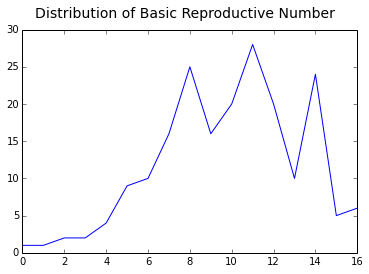

In [7]:
distGraph(dist,save=True)